# Introduction to formative assignment example

The purpose of the formative assignment was to inspect and hone your abilities with basic linear regression models. As these are considered a prerequisite for this course, it is essential that these basic building blocks are understod by students as they engage with the material for multi-level modelling.

This example file will carry out the assignment and illustrate how the assignment could have been done by a student and fulfill all of the requirements. Each step of the assignment in turn will be considered and discussed so that students have an idea of best practice when it comes to carrying out linear models.

Firstly, we will read in the data for the assignment which has been provided on Learn.

In [2]:
#Load the required libraries for loading in the data
library(foreign)
library(haven)
#Load any further libraries like ggplot2 so we can carry out our analysis later on
library(ggplot2)
library(stargazer)
library(dplyr)
#Now we can load in our required dataset
ess_data <- read.dta('ESS.dta')

#Just want to inspect the data to make sure that everything tallies with our work.
#We can also take a look at all of our variables so we can decide which ones to analyse
str(ess_data)

Warning message:
“package ‘haven’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘stargazer’ was built under R version 4.2.3”

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




'data.frame':	36537 obs. of  16 variables:
 $ Country      : Factor w/ 20 levels "Austria\n","Belgium\n",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ indiv        : num  1 2 3 4 5 6 7 8 9 10 ...
 $ gender       : Factor w/ 2 levels "male","female": 1 1 2 1 2 2 2 2 1 2 ...
 $ age          : num  53 49 62 43 40 62 74 40 46 51 ...
 $ eduyrs       : num  11 14 9 18 15 11 10 17 16 8 ...
 $ income       : num  NA 2 NA 9 9 5 NA 9 8 NA ...
 $ Stimulation  : num  -8.57 17.62 -9.76 -11.67 -8.57 ...
 $ Hedonism     : num  11.43 7.62 -9.76 -16.67 11.43 ...
 $ Achievement  : num  -8.57 12.62 5.24 -6.67 -3.57 ...
 $ Universalism : num  1.43 10.95 5.24 20 21.43 ...
 $ Conformity   : num  -3.57 -22.38 5.24 8.33 -28.57 ...
 $ Tradition    : num  6.429 -27.381 0.238 -16.667 -8.571 ...
 $ Benevolence  : num  6.43 -7.38 5.24 3.33 21.43 ...
 $ SelfDirection: num  6.429 17.619 0.238 13.333 11.429 ...
 $ Power        : num  -13.57 -7.38 -4.76 -11.67 -18.57 ...
 $ Security     : num  1.429 -7.381 0.238 8.333 -8.571 ...
 - 

# Crafting a research question/hypothesis

Based on the above, we have quite a lot of information about the dataset. Now, I need to craft a research question.
Based on my own understanding, I would like to examine the relationship between years of education and the importance placed on stimulation (the "Stimulation" variable above). 

The question I want to ask is the following: "Is the number of years of education undergone by a person associated with a change in their level of Stimulation?. Naturally, were I to properly do this assignment, I would back this up with some appropriate literature from psychology. As this is only a formative assignment, there is no need but it is important to consider it. 

My hypothesis would be the following:
The number of years of education is associated with a change the importance they place on stimulation.
Therefore, the null hypothesis is:
The number of years of education has no effect on the importance place on stimulation by an individual.

We now need to create descriptive statistics for the relevant variables we will be using in this assignment.
I will also be interacting years of education with gender so I will provide descriptive statistics on this as well. We can see above that 0 is assocaieted with "male" and 1 with "female".

The code below will create some descriptive statistics for the assignment.

In [3]:
#To create descriptive statistics for this analysis, we will include all of the variables we are thinking about considering
#Firstly, in an simple enough fashion, we can create descriptive statistics for continuous variables
des_stats <- summary(ess_data[, c('eduyrs', 'Stimulation', 'gender')])

print(des_stats)
#We have a little problem when we combine them that the gender variable isn't correclty labeled and we have to do something about the last few rows
#Here's an example of a way to deal with that



#We also need to include the number of individuals in our dataset

n_obs <- rep(paste('N:', length(ess_data$gender), sep = ' '), 3)
des_stats <- rbind(des_stats, n_obs )
                   print(des_stats)
#So, now we can just get stargazer to produce a table for us and send this to a html file ready to be copied to word
stargazer(des_stats, out = 'Descriptive statistics.html')

     eduyrs       Stimulation          gender     
 Min.   : 0.00   Min.   :-44.2105   male  :17188  
 1st Qu.: 9.00   1st Qu.:-14.0476   female:19318  
 Median :12.00   Median : -7.0000   NA's  :   31  
 Mean   :11.92   Mean   : -6.9504                 
 3rd Qu.:14.00   3rd Qu.:  0.2381                 
 Max.   :40.00   Max.   : 32.3809                 
 NA's   :445     NA's   :10                       
          eduyrs         Stimulation            gender       
      "Min.   : 0.00  " "Min.   :-44.2105  " "male  :17188  "
      "1st Qu.: 9.00  " "1st Qu.:-14.0476  " "female:19318  "
      "Median :12.00  " "Median : -7.0000  " "NA's  :   31  "
      "Mean   :11.92  " "Mean   : -6.9504  " NA              
      "3rd Qu.:14.00  " "3rd Qu.:  0.2381  " NA              
      "Max.   :40.00  " "Max.   : 32.3809  " NA              
      "NA's   :445  "   "NA's   :10  "       NA              
n_obs "N: 36537"        "N: 36537"           "N: 36537"      

% Table created by stargazer v.5.

# Dealing with missingness
Now, we just have to ask ourselves what to do with the missing values. There are a number of possible approaches. The main thing we have to do is justify our approach. In keeping with almost everyone who did the assignment, I will delete any rows that contain missing values. This is because I want to keep a standard dataset throughout. That means my models will be easily comparable despite the inclusion of different variables.

We should also interpret our descriptive statistics.

The following code deletes any missing values in these rows. It also seperates the data we need to complete the assignment from any extra data which we cal leave in the old dataset.

I will not here that I won't be centring the independent variable education years. This is because it makes sense not to given our context. There are a substantial number in the dataset with zero years of education. Hence, it makes sense to evaluate an intercept at zero for this variable.

In [4]:
ess_data_complete <- ess_data %>% select(eduyrs, Stimulation, gender) %>% na.omit()

summary(ess_data_complete)
#You can see we have now removed any problematic rows from our data
#We can use the same process as above to count the rows in the dataset

     eduyrs       Stimulation          gender     
 Min.   : 0.00   Min.   :-44.2105   male  :16976  
 1st Qu.: 9.00   1st Qu.:-14.0476   female:19084  
 Median :12.00   Median : -6.9048                 
 Mean   :11.92   Mean   : -6.9369                 
 3rd Qu.:14.00   3rd Qu.:  0.2381                 
 Max.   :40.00   Max.   : 32.3809                 

# Modelling the effect of years of education on the importance of stimulation

Now, we can start modelling the relationship that we were starting with.
Firstly, we will inspect a plot of the relationship between the two variables.
We have to ensure that any plot we create is legible and understandable to the reader

`geom_smooth()` using formula = 'y ~ x'


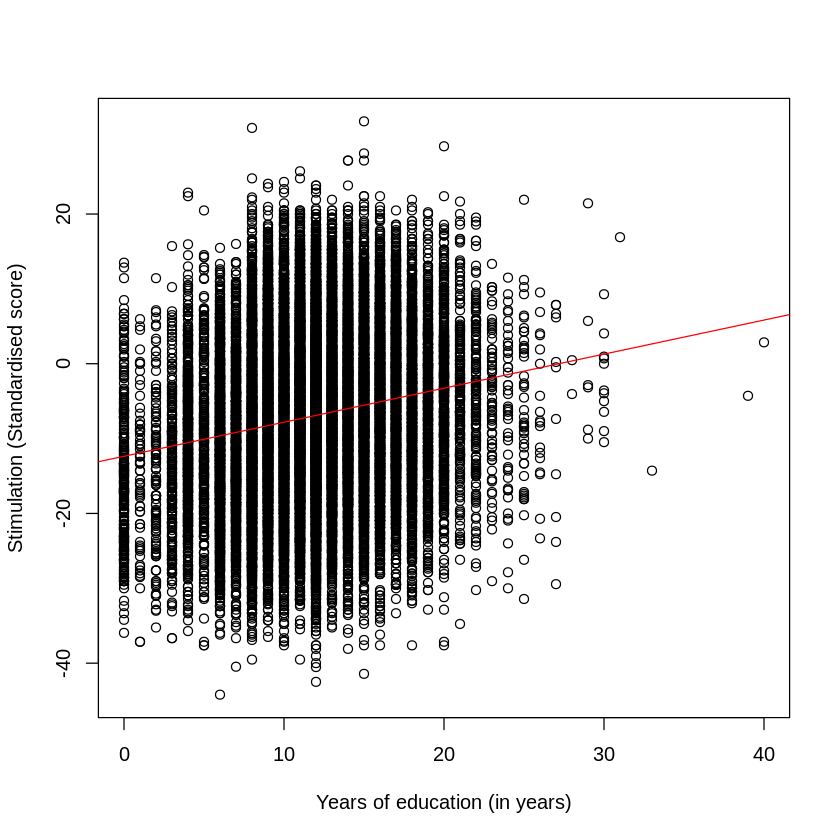

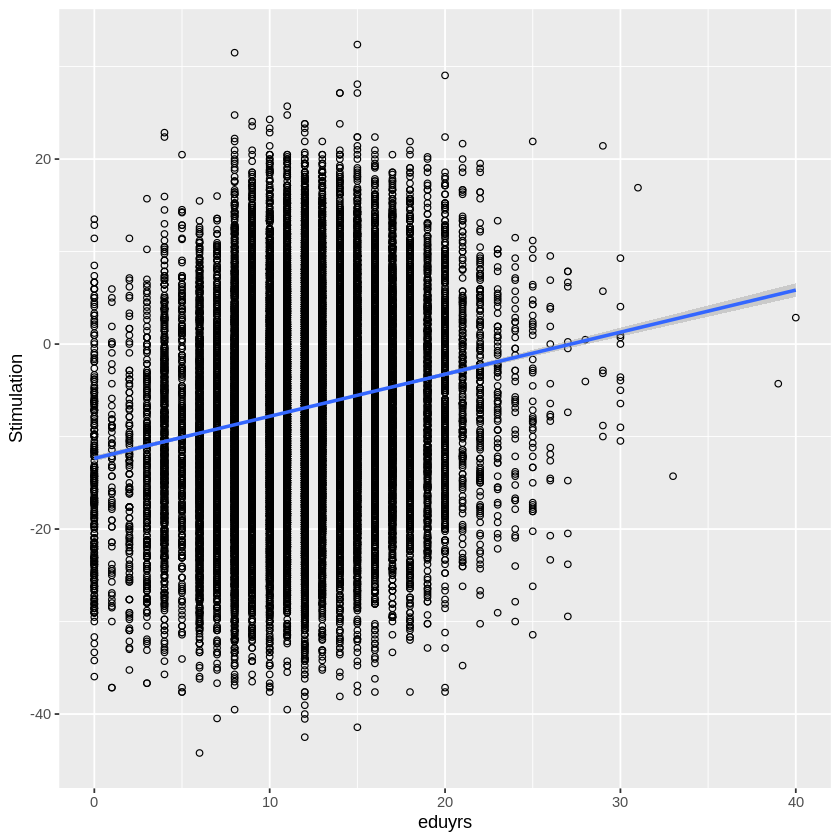

In [5]:
#If  we want to do this in base R, the function below should suffice
plot(ess_data_complete$eduyrs, ess_data_complete$Stimulation, xlab = 'Years of education (in years)', ylab = 'Stimulation (Standardised score)')
#Pretty simply, we can add a line of best fit to this using the abline function and the lm function
abline(lm(Stimulation ~ eduyrs, data = ess_data_complete), col = 'red')

#We can also do this using the ggplot function

ggplot(ess_data_complete, aes(eduyrs, Stimulation)) + geom_point(shape = 1) + geom_smooth(method = 'lm')

So, we can see that there is evidently a pretty strong positive relationship between years of education and Stimulation from the graphs above. Now, we still have to do a regression model for ourselves and then interpret the output

In [48]:
linear_regression_simple <- lm(Stimulation ~ eduyrs, data = ess_data_complete)
summary(linear_regression_simple)

#We can report this to a nice html file in the same way as our descriptive statisitics
stargazer(linear_regression_simple, out = '1st regression output.html')


Call:
lm(formula = Stimulation ~ eduyrs, data = ess_data_complete)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.892  -6.993  -0.092   6.969  40.221 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.3598     0.1661  -74.41   <2e-16 ***
eduyrs        0.4549     0.0132   34.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.06 on 36058 degrees of freedom
Multiple R-squared:  0.03186,	Adjusted R-squared:  0.03184 
F-statistic:  1187 on 1 and 36058 DF,  p-value: < 2.2e-16


The model indicates that as years of education increase by 1, there is a 0.455 increase in Stimulation score keeping all else equal. Although we assume that all else is equal in univariate regression, it really should be said even in univariate models. The p-value for years of education is below 0.05, therefore we are 95% confident that the coefficient is different from zero given our result. Based on this analysis, we can affirm a significant relationship between the 2 variables. Given the strength of the effect associate with a 1 year increase in years of education and the fact that the variable is significant at the 95% level, we can suggest that there is a strong statistically signigficant positive relationship between the two variables.

We also not that a person of zero years of education has a Stimulation score of -12.36 based on the intercept value. We can infer very little from this given the simplicity of our model, However, it suggests that  those with zero years of education have very low levels of Stimulation.

Now, we can move on to our interaction variable model

# Modelling and interpretting interactions


Call:
lm(formula = Stimulation ~ eduyrs + gender + eduyrs:gender, data = ess_data_complete)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.416  -6.941  -0.091   6.899  41.209 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -10.15056    0.24900 -40.765  < 2e-16 ***
eduyrs                0.33889    0.01941  17.457  < 2e-16 ***
genderfemale         -3.81070    0.33358 -11.424  < 2e-16 ***
eduyrs:genderfemale   0.19264    0.02645   7.283 3.34e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.02 on 36056 degrees of freedom
Multiple R-squared:  0.03867,	Adjusted R-squared:  0.03859 
F-statistic: 483.4 on 3 and 36056 DF,  p-value: < 2.2e-16



% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Mon, Feb 12, 2024 - 01:55:02 PM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & Stimulation \\ 
\hline \\[-1.8ex] 
 eduyrs & 0.339$^{***}$ \\ 
  & (0.019) \\ 
  & \\ 
 genderfemale & $-$3.811$^{***}$ \\ 
  & (0.334) \\ 
  & \\ 
 eduyrs:genderfemale & 0.193$^{***}$ \\ 
  & (0.026) \\ 
  & \\ 
 Constant & $-$10.151$^{***}$ \\ 
  & (0.249) \\ 
  & \\ 
\hline \\[-1.8ex] 
Observations & 36,060 \\ 
R$^{2}$ & 0.039 \\ 
Adjusted R$^{2}$ & 0.039 \\ 
Residual Std. Error & 10.024 (df = 36056) \\ 
F Statistic & 483.442$^{***}$ (df = 3; 36056) \\ 
\hline 
\hline \\[-1.8ex] 
\textit{Note:}  & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\ 
\end{tabular} 
\end{table} 


(Intercept)              eduyrs        genderfemale eduyrs:genderfemale 
        -10.1505554           0.3388850          -3.8106978           0.1926449

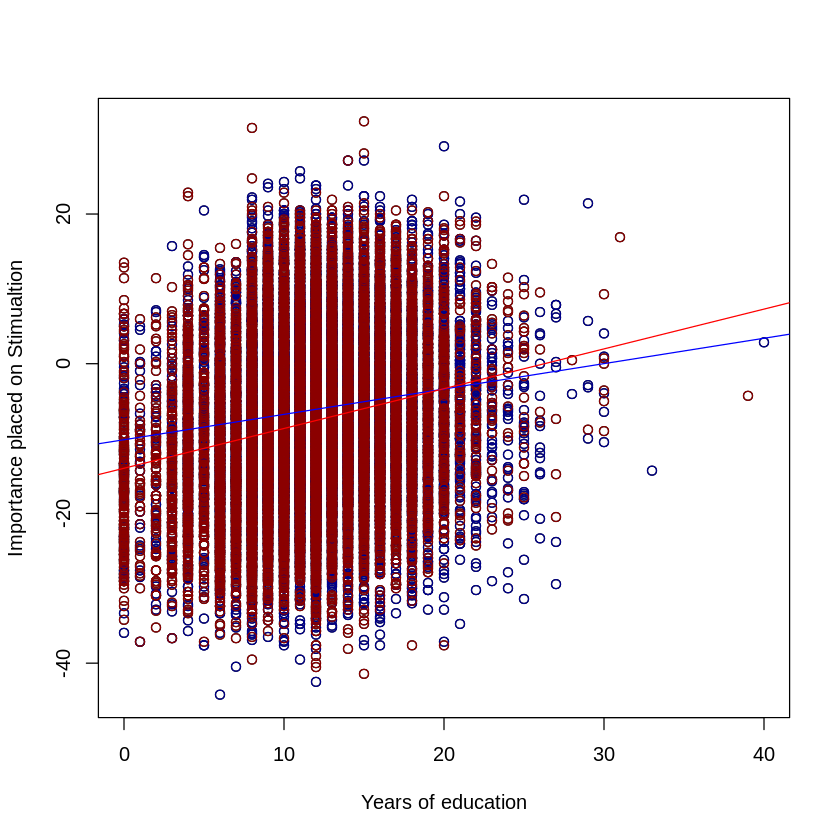

In [22]:
#In our interaction variable model, we want to see how gender interacts with years of education and its effect on the importance of Stimulation
#To do this, the model must include both the the variables eduyrs and gender, as well as an interaction effect

linear_regression_inter <- lm(Stimulation ~ eduyrs + gender + eduyrs:gender, data = ess_data_complete)
summary(linear_regression_inter)

stargazer(linear_regression_inter)

#Let's also plot the relationships for the 2 genders
#First, let's do it by hand

plot(ess_data_complete$eduyrs, ess_data_complete$Stimulation, xlab = 'Years of education', ylab = 'Importance placed on Stimualtion')
#Now to add the male regression line, we can simply add the intercept and eduyrs coefficient to the graph
#Let's make men distinguishable from women in the graph
points(ess_data_complete$eduyrs[which(ess_data_complete$gender == 'male')], 
                                      ess_data_complete$Stimulation[which(ess_data_complete$gender == 'male')], col = 'darkblue')
points(ess_data_complete$eduyrs[which(ess_data_complete$gender == 'female')], 
                                      ess_data_complete$Stimulation[which(ess_data_complete$gender == 'female')], col = 'darkred')

coef(linear_regression_inter)
abline(coef(linear_regression_inter)[1], coef(linear_regression_inter)[2], col = 'blue')
abline(coef(linear_regression_inter)[1] + coef(linear_regression_inter)[3] , 
       coef(linear_regression_inter)[2] + coef(linear_regression_inter)[4] , col = 'red')

So, now we have our interaction model above. Being a woman is associated with a decrease in Stimulation score or 3.81 compared to men ceteris paribus. This is significant at the 95% confidence level meaning that we can be 95% confident that our result is different from zero and we therefore consider it to be statistically significant. Our interaction term is also signficant. It suggests (as can be seen from the graph) that women increase in the importance they aportion to stimulation compared to men. Lastly, our interaction indicates that a man with 0 years of education is estiamted to have a score of -10.15 by the model.

# Modelling and interpretting ploynomial models


Call:
lm(formula = Stimulation ~ eduyrs + I(eduyrs^2), data = ess_data_complete)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.110  -6.964  -0.125   6.972  40.229 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.161888   0.307852  -52.50   <2e-16 ***
eduyrs        1.164819   0.050215   23.20   <2e-16 ***
I(eduyrs^2)  -0.029463   0.002011  -14.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.03 on 36057 degrees of freedom
Multiple R-squared:  0.03759,	Adjusted R-squared:  0.03754 
F-statistic: 704.2 on 2 and 36057 DF,  p-value: < 2.2e-16


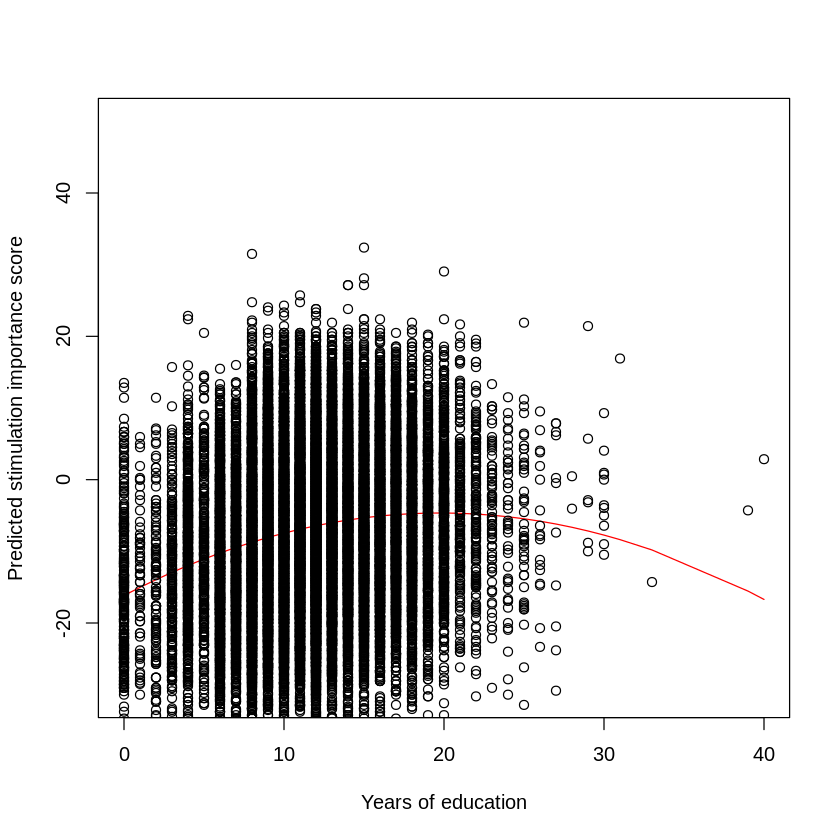


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Mon, Feb 12, 2024 - 01:45:03 PM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & Stimulation \\ 
\hline \\[-1.8ex] 
 eduyrs & 1.165$^{***}$ \\ 
  & (0.050) \\ 
  & \\ 
 I(eduyrs$\hat{\mkern6mu}$2) & $-$0.029$^{***}$ \\ 
  & (0.002) \\ 
  & \\ 
 Constant & $-$16.162$^{***}$ \\ 
  & (0.308) \\ 
  & \\ 
\hline \\[-1.8ex] 
Observations & 36,060 \\ 
R$^{2}$ & 0.038 \\ 
Adjusted R$^{2}$ & 0.038 \\ 
Residual Std. Error & 10.029 (df = 36057) \\ 
F Statistic & 704.183$^{***}$ (df = 2; 36057) \\ 
\hline 
\hline \\[-1.8ex] 
\textit{Note:}  & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\ 
\end{tabular} 
\end{table} 


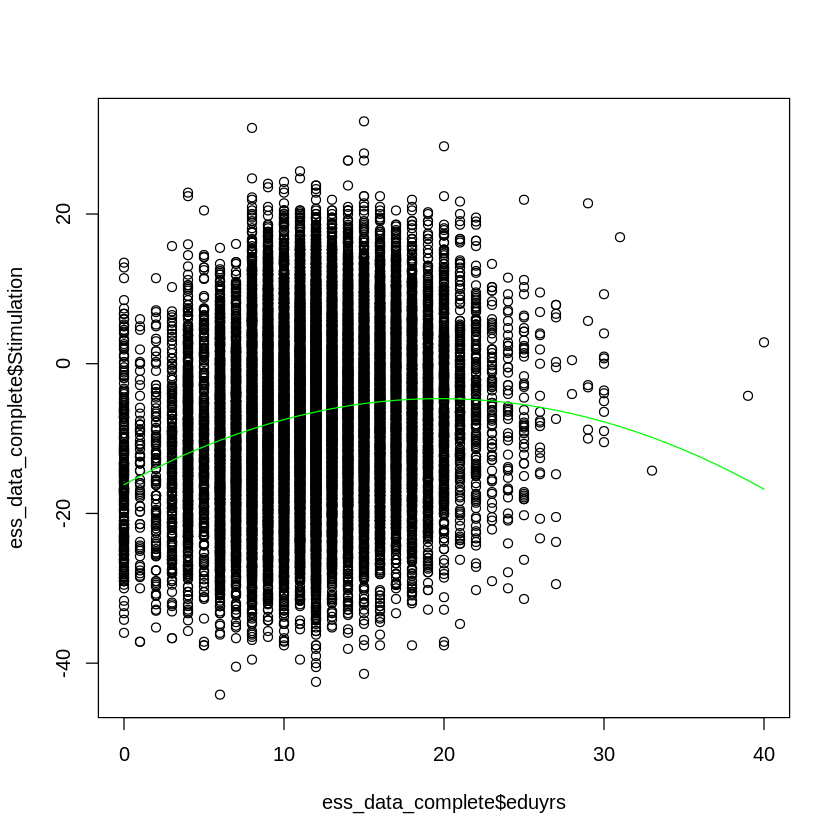

In [18]:

#We have to take an extra step here because its quadratic
#We need to sort our observations by our predicted score so they will be in order for our graphing
ess_data_complete <- ess_data_complete[order(ess_data_complete$eduyrs),]

#Now our quadratic model

quadratic_model <- lm(Stimulation ~ eduyrs + I(eduyrs^2), data = ess_data_complete)
summary(quadratic_model)

#There are a couple of ways we could plot this model actually
#The simplest way you'll be most familiar with is this

#We predict our model based on our observations
pred_score <- predict(quadratic_model)
ess_data_complete[, 'predicted_value'] <- pred_score
#We only want the unique data points
Unique_data <- unique(ess_data_complete[, c('eduyrs', 'predicted_value')])
plot(Unique_data$eduyrs, Unique_data$predicted_value, type = 'l', ylim = c(-30, 50), col = 'red', 
     xlab = 'Years of education', ylab ='Predicted stimulation importance score')

#We create our scatter plot
#For context, we can add the rest of the points

points(ess_data_complete$eduyrs, ess_data_complete$Stimulation)

#Alternatively, we can just create a new function and pass a vector thorugh it
pred_func <- function(x){
    y <- -16.162 + 1.165 * x - 0.0295 * x^2
    return(y)
}
sample_ed_years <- c(0:40)

pred_data_sample <- pred_func(sample_ed_years)
plot(ess_data_complete$eduyrs, ess_data_complete$Stimulation)
lines(sample_ed_years, pred_data_sample, col = 'green', xlab = 'Years of education', ylab ='Stimulation importance score' )


stargazer(quadratic_model)

Based on the model above, we can establish that both years of education, and the quadratic variable are significant at the 95% level. A 1 year increase in a person's year of education is associated with a 1.165 increase in the importance placed on Stimulation ceteris paribus. However, the quadratic variable is negative with a coefficient of -0.029. This indicates that the importance placed on Stimulation increases but at a decreasing rate. 

If we want to know the rate at which this decreases, we can actually find this out. This is simply a matter of differentiating the function with respect to age. The derivative (dydx) of a function is simple to calculate in R. All we really have to do is multiply our coefficient on the quadratic term by 2. I have formally shown this below.

Stimulation = 1.164819 * $eduyrs$ - -0.029463 * $eduyrs^{2}$

$\frac{d Stimulation}{d eduyrs}$ = 1.164819 - (0.029463 * 2)eduyrs

The last point is that we can test some of the assumptions of linear regression here. We can just use some qqplots for this.


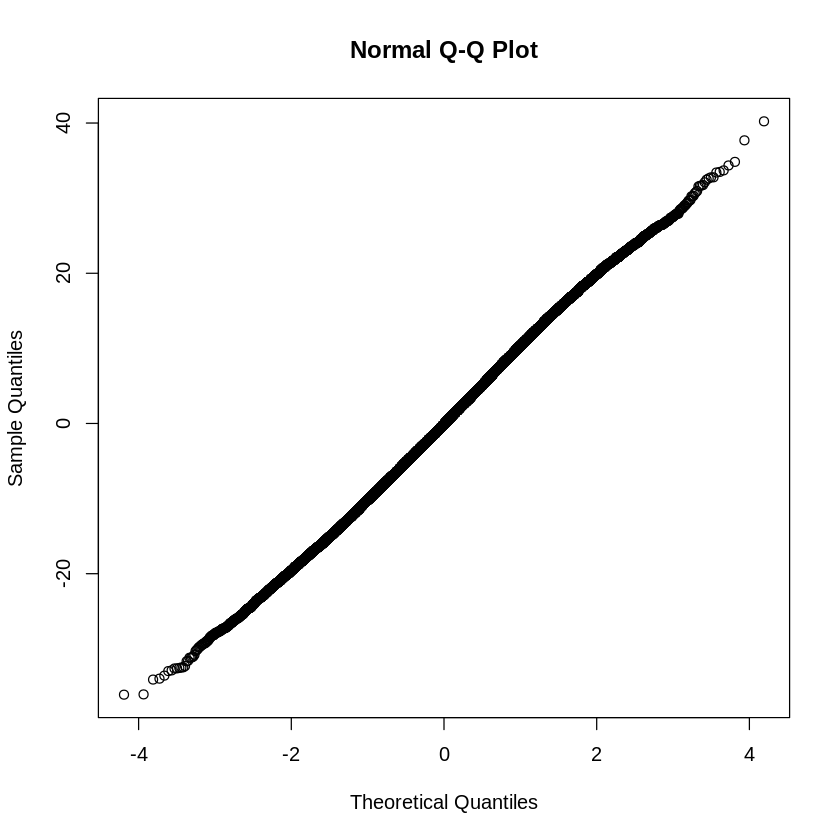

In [21]:
QQ_plot_check <- qqnorm(quadratic_model$residual)
#The check looks ok for heteroskedasticity.
#If it did not, we might use robust standard errors to correct for it.